In [1]:
!apt-get install r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
!apt-get install -y r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
!pip install rpy2


In [5]:
%load_ext rpy2.ipython


In [6]:
%%R
print("Hello from R!")


[1] "Hello from R!"


In [9]:

%%R
data <- read.csv("/content/indexProcessed.csv")
head(data)


  Index       Date   Open   High    Low  Close Adj.Close Volume CloseUSD
1   HSI 1986-12-31 2568.3 2568.3 2568.3 2568.3    2568.3      0  333.879
2   HSI 1987-01-02 2540.1 2540.1 2540.1 2540.1    2540.1      0  330.213
3   HSI 1987-01-05 2552.4 2552.4 2552.4 2552.4    2552.4      0  331.812
4   HSI 1987-01-06 2583.9 2583.9 2583.9 2583.9    2583.9      0  335.907
5   HSI 1987-01-07 2607.1 2607.1 2607.1 2607.1    2607.1      0  338.923
6   HSI 1987-01-08 2603.3 2603.3 2603.3 2603.3    2603.3      0  338.429


In [10]:
%%R

data$Date <- as.Date(data$Date, format="%Y-%m-%d")


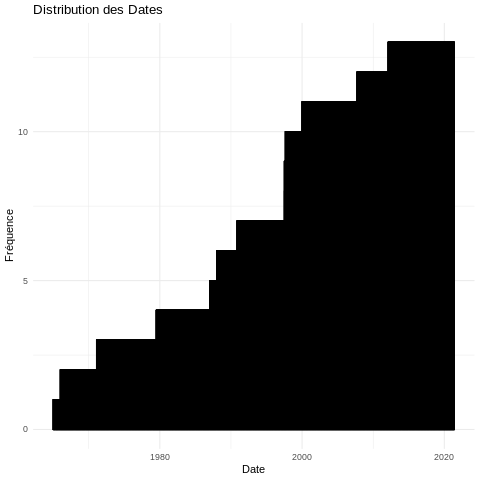

In [11]:
%%R

library(ggplot2)
ggplot(data, aes(x = Date)) +
  geom_histogram(binwidth = 1, color = "black", fill = "skyblue") +
  labs(title = "Distribution des Dates", x = "Date", y = "Fréquence") +
  theme_minimal()

In [13]:
%%R

any(duplicated(data))


[1] FALSE


In [14]:
%%R

any(is.na(data))


[1] FALSE


In [19]:
%%R
data_1980 <- subset(data, format(Date, "%Y") == "1980")
head(data_1980)


      Index       Date   Open   High    Low  Close Adj.Close Volume CloseUSD
11998   NYA 1980-01-02 641.72 641.72 641.72 641.72    641.72      0   641.72
11999   NYA 1980-01-03 638.02 638.02 638.02 638.02    638.02      0   638.02
12000   NYA 1980-01-04 646.80 646.80 646.80 646.80    646.80      0   646.80
12001   NYA 1980-01-07 649.23 649.23 649.23 649.23    649.23      0   649.23
12002   NYA 1980-01-08 661.81 661.81 661.81 661.81    661.81      0   661.81
12003   NYA 1980-01-09 663.18 663.18 663.18 663.18    663.18      0   663.18


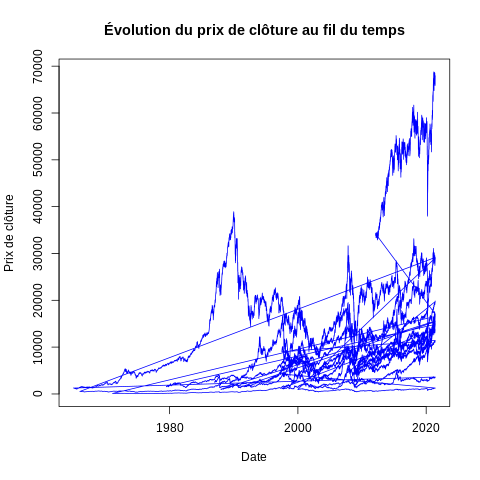

In [18]:
%%R
plot(data$Date, data$Close, type="l", col="blue", xlab="Date", ylab="Prix de clôture", main="Évolution du prix de clôture au fil du temps")


In [20]:
%%R
cor(data[, c("Open", "Close", "Volume")], use="complete.obs")


            Open     Close    Volume
Open   1.0000000 0.9999041 0.1290899
Close  0.9999041 1.0000000 0.1289709
Volume 0.1290899 0.1289709 1.0000000
